In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import os

In [54]:
def corr(mat):
    sha = mat.shape
    corr_mat = np.zeros(sha)
    for i in range(sha[0]):
        for j in range(sha[1]):
            corr_mat[i,j] = mat[i,j]/np.sqrt(mat[i,i]*mat[j,j])      
    return corr_mat
def plot_corr(mat):
    plt.imshow(corr(mat))
    plt.colorbar()

In [2]:
rs = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD_old/LiteBird/RS/Pseudo_1024/C_l'
gs = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD_old/LiteBird/GS/Pseudo_1024/C_l'

In [34]:
rs_spectra = [pk.load(open(os.path.join(rs,f'sims_delensed_p_eb_{i}.pkl'),'rb'))[3][3:14] for i in range(100)]

In [35]:
gs_spectra = [pk.load(open(os.path.join(gs,f'sims_delensed_p_eb_{i}.pkl'),'rb'))[3][3:14] for i in range(100)]

In [39]:
ncov = len(gs_spectra[0])

In [ ]:
rs_mean = np.zeros(ncov)
for i in range(100):
    rs_mean += rs_spectra[i]
rs_mean/=100

In [ ]:
gs_mean = np.zeros(ncov)
for i in range(100):
    gs_mean += gs_spectra[i]
gs_mean/=100

In [42]:
rs_debias_mean = np.zeros(ncov)
for i in range(100):
    rs_debias_mean += rs_spectra[i] - gs_spectra[i]
rs_debias_mean/=100

In [ ]:
rs_only_cov = np.zeros([ncov,ncov])
for i in range(100):
    spec = rs_spectra[i]
    rs_only_cov += spec[None,:]*spec[:,None]
rs_only_cov/=100
rs_only_cov -= rs_mean[None,:]*rs_mean[:,None]

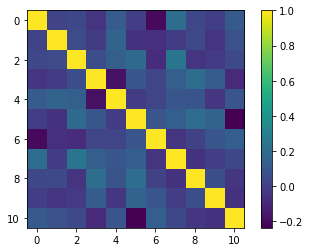

In [ ]:
plot_corr(rs_only_cov)

In [ ]:
gs_only_cov = np.zeros([ncov,ncov])
for i in range(100):
    spec = gs_spectra[i]
    gs_only_cov += spec[None,:]*spec[:,None]
gs_only_cov/=100
gs_only_cov -= gs_mean[None,:]*gs_mean[:,None]

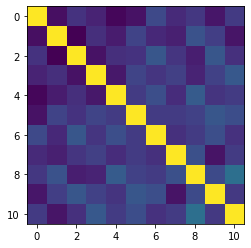

In [ ]:
plot_corr(gs_only_cov)

In [49]:
rs_m_gs_cov = np.zeros([ncov,ncov])
for i in range(100):
    spec = rs_spectra[i] - gs_spectra[i]
    rs_m_gs_cov += spec[None,:]*spec[:,None]
rs_m_gs_cov/=100
rs_m_gs_cov -= rs_debias_mean[None,:]*rs_debias_mean[:,None]

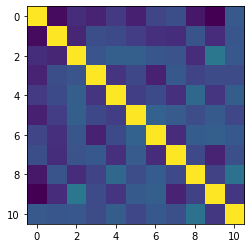

In [50]:
plot_corr(rs_m_gs_cov)

In [51]:
rs_gs_cov = np.zeros([ncov,ncov])
for i in range(100):
    spec_r = rs_spectra[i]
    spec_g = gs_spectra[i]
    rs_gs_cov += spec_r[None,:]*spec_g[:,None]
rs_gs_cov/=100
rs_gs_cov -= rs_mean[None,:]*gs_mean[:,None]

In [64]:
rs_diag = np.zeros([ncov,ncov])
np.fill_diagonal(rs_diag,np.diag(rs_only_cov))
gs_diag = np.zeros([ncov,ncov])
np.fill_diagonal(gs_diag,np.diag(gs_only_cov))
final = rs_diag + gs_diag - 2*rs_gs_cov

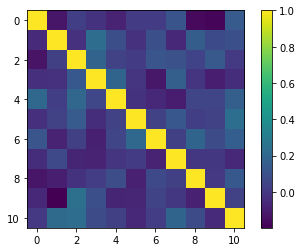

In [65]:
plot_corr(final)

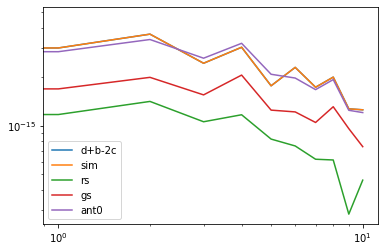

In [69]:
plt.loglog(np.diag(final),label='d+b-2c')
plt.loglog(np.diag(rs_m_gs_cov),label='sim')
plt.loglog(np.diag(rs_only_cov),label='rs')
plt.loglog(np.diag(gs_only_cov),label='gs')
plt.loglog(np.diag(gs_only_cov)+np.diag(rs_only_cov),label='ant0')
plt.legend()